In this notebook, we will replicate what was found in Rinder et al. study.

Let's load the data and preprocess it. [Link](https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSE165623)

In [1]:
import pandas as pd
import scanpy as sc
import numpy as np
import matplotlib.pyplot as plt
import GEOparse
from scipy.io import mmread

In [2]:
adata_45 = sc.read_10x_mtx(
    "GSM5047045/", 
    var_names="gene_symbols", 
    cache=True 
)
adata_45.obs["tissue"] = "skin"

adata_46 = sc.read_10x_mtx(
    "GSM5047046/", 
    var_names="gene_symbols", 
    cache=True 
)
adata_46.obs["tissue"] = "LN"

adata_47 = sc.read_10x_mtx(
    "GSM5047047/", 
    var_names="gene_symbols", 
    cache=True 
)
adata_47.obs["tissue"] = "PBMC"

adata = adata_45.concatenate(adata_46, adata_47)

print(adata)

/tmp/ipykernel_29406/3075109398.py:22: FutureWarning: Use anndata.concat instead of AnnData.concatenate, AnnData.concatenate is deprecated and will be removed in the future. See the tutorial for concat at: https://anndata.readthedocs.io/en/latest/concatenation.html
  adata = adata_45.concatenate(adata_46, adata_47)


AnnData object with n_obs × n_vars = 12754 × 33538
    obs: 'tissue', 'batch'
    var: 'gene_ids', 'feature_types'


In [3]:
adata.var

,gene_ids,feature_types
MIR1302-2HG,ENSG00000243485,Gene Expression
FAM138A,ENSG00000237613,Gene Expression
OR4F5,ENSG00000186092,Gene Expression
AL627309.1,ENSG00000238009,Gene Expression
AL627309.3,ENSG00000239945,Gene Expression
...,...,...
AC233755.2,ENSG00000277856,Gene Expression
AC233755.1,ENSG00000275063,Gene Expression
AC240274.1,ENSG00000271254,Gene Expression
AC213203.1,ENSG00000277475,Gene Expression


In [4]:
adata.var["mt"] = adata.var_names.str.startswith('MT-')
sc.pp.calculate_qc_metrics(adata, qc_vars=["mt"], percent_top=None, inplace=True)

In [5]:
adata.obs

,tissue,batch,n_genes_by_counts,log1p_n_genes_by_counts,total_counts,log1p_total_counts,total_counts_mt,log1p_total_counts_mt,pct_counts_mt
AAACCTGCACTTACGA-1-0,skin,0,1734,7.458763,5019.0,8.521185,85.0,4.454347,1.693564
AAACCTGCATGTAGTC-1-0,skin,0,1244,7.126891,3243.0,8.084562,188.0,5.241747,5.797101
AAACCTGGTAATCGTC-1-0,skin,0,1771,7.479864,5896.0,8.682199,312.0,5.746203,5.291723
AAACCTGGTACAGTTC-1-0,skin,0,1979,7.590852,6400.0,8.764210,182.0,5.209486,2.843750
AAACCTGGTCCGTTAA-1-0,skin,0,474,6.163315,1279.0,7.154615,550.0,6.311735,43.002346
...,...,...,...,...,...,...,...,...,...
TTTGTCACATTTGCCC-1-2,PBMC,2,1352,7.210080,3310.0,8.105005,132.0,4.890349,3.987916
TTTGTCAGTTCCGTCT-1-2,PBMC,2,1774,7.481556,4778.0,8.471987,129.0,4.867535,2.699874
TTTGTCATCGCATGAT-1-2,PBMC,2,1715,7.447751,4288.0,8.363809,445.0,6.100319,10.377798
TTTGTCATCGGGAGTA-1-2,PBMC,2,1496,7.311218,3798.0,8.242493,144.0,4.976734,3.791469


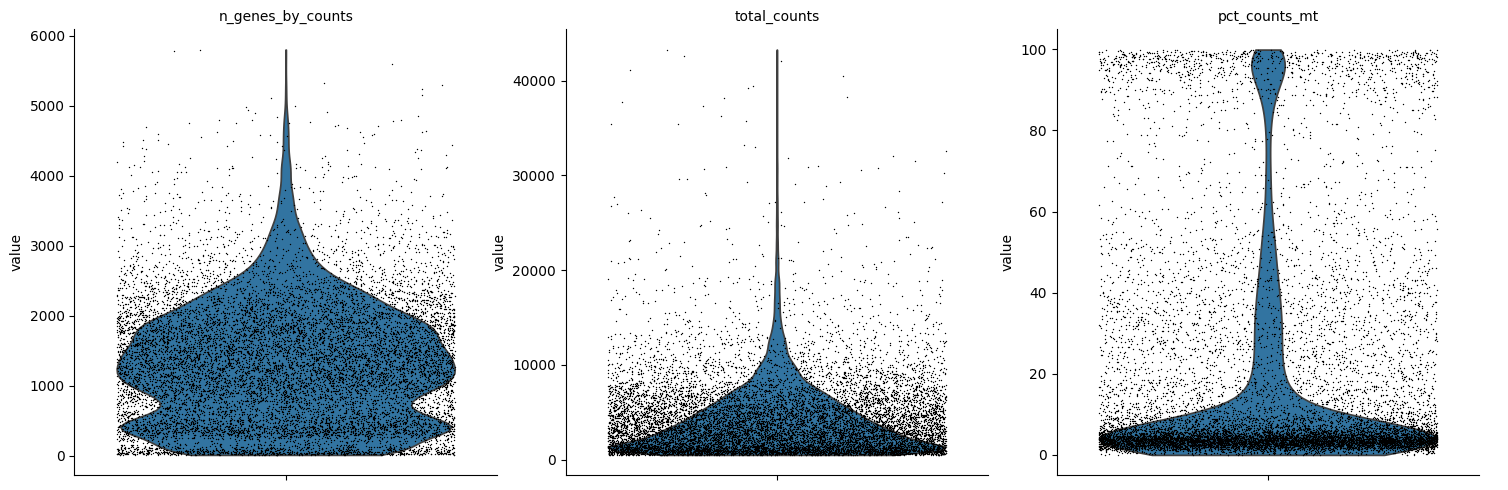

In [6]:
sc.pl.violin(adata, ["n_genes_by_counts", "total_counts", "pct_counts_mt"], jitter=0.4, multi_panel=True)

In [7]:
(adata.obs.n_genes_by_counts > 200).to_list() and (adata.obs.n_genes_by_counts < 4000).to_list()

[True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True

In [8]:
adata

AnnData object with n_obs × n_vars = 12754 × 33538
    obs: 'tissue', 'batch', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt'
    var: 'gene_ids', 'feature_types', 'mt', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts'

In [9]:
adata.obs.pct_counts_mt.max()

np.float32(99.949165)

In [10]:
adata = adata[(adata.obs.n_genes_by_counts > 200).to_list() and (adata.obs.n_genes_by_counts < 4000).to_list(), :]
adata = adata[(adata.obs.pct_counts_mt < 12).to_list(), :]

In [11]:
adata

View of AnnData object with n_obs × n_vars = 8733 × 33538
    obs: 'tissue', 'batch', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt'
    var: 'gene_ids', 'feature_types', 'mt', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts'

In [12]:
print(f"adata.X: {adata.X.max()}")

adata.X: 22987.0


In [13]:
sc.pp.normalize_total(adata, target_sum=1e4)

/home/arsalan/Desktop/HW/Genomic/Project/venv/lib/python3.12/site-packages/scanpy/preprocessing/_normalization.py:207: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


In [14]:
print(f"adata.X: {adata.X.max()}")

adata.X: 5934.11376953125


In [15]:
sc.pp.log1p(adata)

In [16]:
print(f"adata.X: {adata.X.max()}")

adata.X: 8.688641548156738


In [17]:
adata.var

,gene_ids,feature_types,mt,n_cells_by_counts,mean_counts,log1p_mean_counts,pct_dropout_by_counts,total_counts,log1p_total_counts
MIR1302-2HG,ENSG00000243485,Gene Expression,False,1,0.000078,0.000078,99.992159,1.0,0.693147
FAM138A,ENSG00000237613,Gene Expression,False,0,0.000000,0.000000,100.000000,0.0,0.000000
OR4F5,ENSG00000186092,Gene Expression,False,0,0.000000,0.000000,100.000000,0.0,0.000000
AL627309.1,ENSG00000238009,Gene Expression,False,4,0.000314,0.000314,99.968637,4.0,1.609438
AL627309.3,ENSG00000239945,Gene Expression,False,0,0.000000,0.000000,100.000000,0.0,0.000000
...,...,...,...,...,...,...,...,...,...
AC233755.2,ENSG00000277856,Gene Expression,False,1,0.000078,0.000078,99.992159,1.0,0.693147
AC233755.1,ENSG00000275063,Gene Expression,False,1,0.000314,0.000314,99.992159,4.0,1.609438
AC240274.1,ENSG00000271254,Gene Expression,False,40,0.003136,0.003131,99.686373,40.0,3.713572
AC213203.1,ENSG00000277475,Gene Expression,False,0,0.000000,0.000000,100.000000,0.0,0.000000


In [18]:
sc.pp.highly_variable_genes(adata, n_top_genes=2000)

In [19]:
adata.var

,gene_ids,feature_types,mt,n_cells_by_counts,mean_counts,log1p_mean_counts,pct_dropout_by_counts,total_counts,log1p_total_counts,highly_variable,means,dispersions,dispersions_norm
MIR1302-2HG,ENSG00000243485,Gene Expression,False,1,0.000078,0.000078,99.992159,1.0,0.693147,False,1.000000e-12,NaN,NaN
FAM138A,ENSG00000237613,Gene Expression,False,0,0.000000,0.000000,100.000000,0.0,0.000000,False,1.000000e-12,NaN,NaN
OR4F5,ENSG00000186092,Gene Expression,False,0,0.000000,0.000000,100.000000,0.0,0.000000,False,1.000000e-12,NaN,NaN
AL627309.1,ENSG00000238009,Gene Expression,False,4,0.000314,0.000314,99.968637,4.0,1.609438,False,1.710776e-03,1.680008,0.872923
AL627309.3,ENSG00000239945,Gene Expression,False,0,0.000000,0.000000,100.000000,0.0,0.000000,False,1.000000e-12,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
AC233755.2,ENSG00000277856,Gene Expression,False,1,0.000078,0.000078,99.992159,1.0,0.693147,True,8.907174e-04,2.051826,1.524879
AC233755.1,ENSG00000275063,Gene Expression,False,1,0.000314,0.000314,99.992159,4.0,1.609438,False,2.252847e-04,0.676831,-0.886077
AC240274.1,ENSG00000271254,Gene Expression,False,40,0.003136,0.003131,99.686373,40.0,3.713572,False,1.047844e-02,1.243889,0.108218
AC213203.1,ENSG00000277475,Gene Expression,False,0,0.000000,0.000000,100.000000,0.0,0.000000,False,1.000000e-12,NaN,NaN


In [20]:
adata

AnnData object with n_obs × n_vars = 8733 × 33538
    obs: 'tissue', 'batch', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt'
    var: 'gene_ids', 'feature_types', 'mt', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'log1p', 'hvg'

In [21]:
adata = adata[:, adata.var.highly_variable]

In [22]:
adata

View of AnnData object with n_obs × n_vars = 8733 × 2000
    obs: 'tissue', 'batch', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt'
    var: 'gene_ids', 'feature_types', 'mt', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'log1p', 'hvg'

In [23]:
sc.tl.pca(adata)

/home/arsalan/Desktop/HW/Genomic/Project/venv/lib/python3.12/site-packages/scanpy/preprocessing/_pca.py:314: ImplicitModificationWarning: Setting element `.obsm['X_pca']` of view, initializing view as actual.
  adata.obsm[key_obsm] = X_pca


In [24]:
adata

AnnData object with n_obs × n_vars = 8733 × 2000
    obs: 'tissue', 'batch', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt'
    var: 'gene_ids', 'feature_types', 'mt', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'log1p', 'hvg', 'pca'
    obsm: 'X_pca'
    varm: 'PCs'

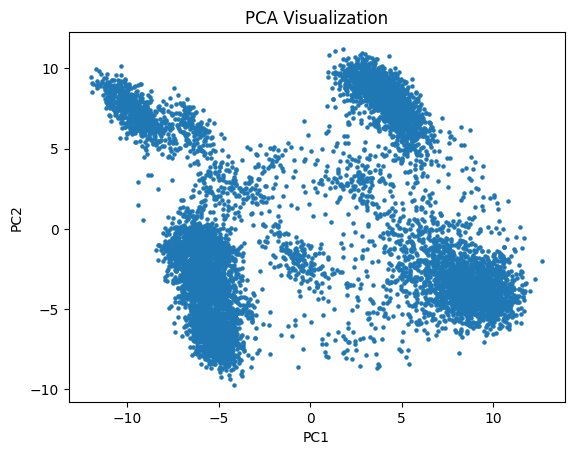

In [25]:
plt.scatter(adata.obsm['X_pca'][:, 0], adata.obsm['X_pca'][:, 1], s=5)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA Visualization')
plt.show()

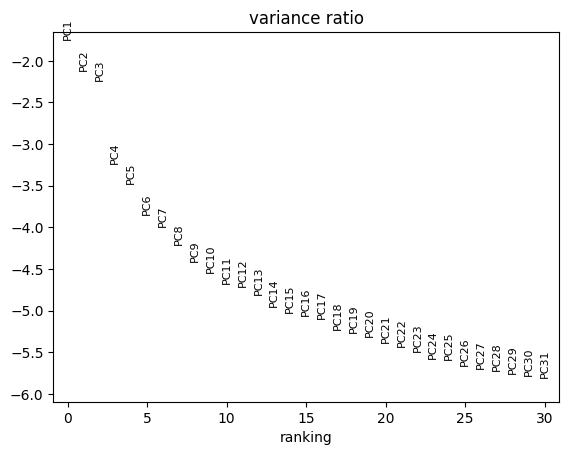

In [26]:
# Plot elbow
sc.pl.pca_variance_ratio(adata, log=True)

In [27]:
adata

AnnData object with n_obs × n_vars = 8733 × 2000
    obs: 'tissue', 'batch', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt'
    var: 'gene_ids', 'feature_types', 'mt', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'log1p', 'hvg', 'pca'
    obsm: 'X_pca'
    varm: 'PCs'

In [28]:
sc.pp.neighbors(adata, n_pcs=22, n_neighbors=15)

/home/arsalan/Desktop/HW/Genomic/Project/venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [29]:
adata

AnnData object with n_obs × n_vars = 8733 × 2000
    obs: 'tissue', 'batch', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt'
    var: 'gene_ids', 'feature_types', 'mt', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'log1p', 'hvg', 'pca', 'neighbors'
    obsm: 'X_pca'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

In [30]:
sc.tl.umap(adata)

In [31]:
adata

AnnData object with n_obs × n_vars = 8733 × 2000
    obs: 'tissue', 'batch', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt'
    var: 'gene_ids', 'feature_types', 'mt', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'log1p', 'hvg', 'pca', 'neighbors', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

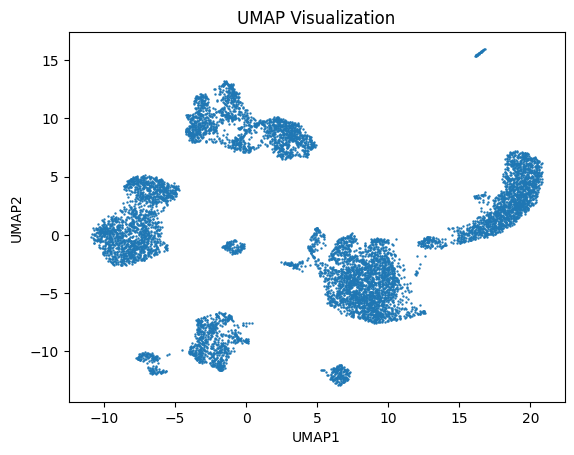

In [32]:
plt.scatter(adata.obsm['X_umap'][:, 0], adata.obsm['X_umap'][:, 1], s=0.5)
plt.xlabel('UMAP1')
plt.ylabel('UMAP2')
plt.title('UMAP Visualization')
plt.show()

In [33]:
adata.obs

,tissue,batch,n_genes_by_counts,log1p_n_genes_by_counts,total_counts,log1p_total_counts,total_counts_mt,log1p_total_counts_mt,pct_counts_mt
AAACCTGCACTTACGA-1-0,skin,0,1734,7.458763,5019.0,8.521185,85.0,4.454347,1.693564
AAACCTGCATGTAGTC-1-0,skin,0,1244,7.126891,3243.0,8.084562,188.0,5.241747,5.797101
AAACCTGGTAATCGTC-1-0,skin,0,1771,7.479864,5896.0,8.682199,312.0,5.746203,5.291723
AAACCTGGTACAGTTC-1-0,skin,0,1979,7.590852,6400.0,8.764210,182.0,5.209486,2.843750
AAACCTGGTGATGCCC-1-0,skin,0,2394,7.781139,9508.0,9.159994,208.0,5.342334,2.187631
...,...,...,...,...,...,...,...,...,...
TTTGTCACATTTGCCC-1-2,PBMC,2,1352,7.210080,3310.0,8.105005,132.0,4.890349,3.987916
TTTGTCAGTTCCGTCT-1-2,PBMC,2,1774,7.481556,4778.0,8.471987,129.0,4.867535,2.699874
TTTGTCATCGCATGAT-1-2,PBMC,2,1715,7.447751,4288.0,8.363809,445.0,6.100319,10.377798
TTTGTCATCGGGAGTA-1-2,PBMC,2,1496,7.311218,3798.0,8.242493,144.0,4.976734,3.791469


In [35]:
sc.tl.louvain(adata, resolution=0.6)

In [36]:
adata.obs

,tissue,batch,n_genes_by_counts,log1p_n_genes_by_counts,total_counts,log1p_total_counts,total_counts_mt,log1p_total_counts_mt,pct_counts_mt,louvain
AAACCTGCACTTACGA-1-0,skin,0,1734,7.458763,5019.0,8.521185,85.0,4.454347,1.693564,4
AAACCTGCATGTAGTC-1-0,skin,0,1244,7.126891,3243.0,8.084562,188.0,5.241747,5.797101,2
AAACCTGGTAATCGTC-1-0,skin,0,1771,7.479864,5896.0,8.682199,312.0,5.746203,5.291723,2
AAACCTGGTACAGTTC-1-0,skin,0,1979,7.590852,6400.0,8.764210,182.0,5.209486,2.843750,0
AAACCTGGTGATGCCC-1-0,skin,0,2394,7.781139,9508.0,9.159994,208.0,5.342334,2.187631,2
...,...,...,...,...,...,...,...,...,...,...
TTTGTCACATTTGCCC-1-2,PBMC,2,1352,7.210080,3310.0,8.105005,132.0,4.890349,3.987916,6
TTTGTCAGTTCCGTCT-1-2,PBMC,2,1774,7.481556,4778.0,8.471987,129.0,4.867535,2.699874,3
TTTGTCATCGCATGAT-1-2,PBMC,2,1715,7.447751,4288.0,8.363809,445.0,6.100319,10.377798,1
TTTGTCATCGGGAGTA-1-2,PBMC,2,1496,7.311218,3798.0,8.242493,144.0,4.976734,3.791469,6


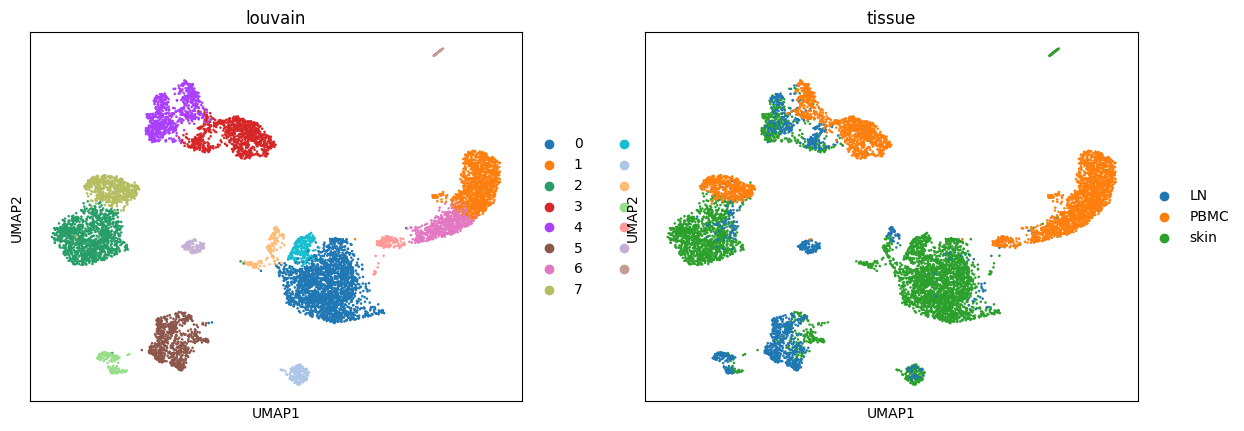

In [39]:
sc.pl.umap(adata, color=["louvain", "tissue"])

In [54]:
sc.tl.dendrogram(adata, groupby="cell_type")
sc.pl.dendrogram(adata, groupby="cell_type")

ValueError: groupby has to be a valid observation. Given value: cell_type, valid observations: ['n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'louvain']

In [3]:
# Load Data
gse = GEOparse.get_GEO(geo="GSE165623", destdir=".")
# gse.gsms

26-Nov-2024 11:33:14 DEBUG utils - Directory . already exists. Skipping.
26-Nov-2024 11:33:14 INFO GEOparse - File already exist: using local version.
26-Nov-2024 11:33:14 INFO GEOparse - Parsing ./GSE165623_family.soft.gz: 
26-Nov-2024 11:33:14 DEBUG GEOparse - DATABASE: GeoMiame
26-Nov-2024 11:33:14 DEBUG GEOparse - SERIES: GSE165623
26-Nov-2024 11:33:14 DEBUG GEOparse - PLATFORM: GPL24676
26-Nov-2024 11:33:14 DEBUG GEOparse - SAMPLE: GSM5047045
26-Nov-2024 11:33:14 DEBUG GEOparse - SAMPLE: GSM5047046
26-Nov-2024 11:33:14 DEBUG GEOparse - SAMPLE: GSM5047047


In [ ]:
matrix = mmread("GSM5047045/GSM5047045_skin_matrix.mtx.gz").toarray()
barcodes = pd.read_csv("GSM5047045/GSM5047045_skin_barcodes.tsv.gz", header=None, names=["Cell_ID"])
features = pd.read_csv("GSM5047045/GSM5047045_skin_features.tsv.gz", sep="\t", header=None, names=["Gene_ID", "Gene_Symbol", "Type"])

expression_data_GSM5047045 = pd.DataFrame(matrix, index=features["Gene_Symbol"], columns=barcodes["Cell_ID"])
expression_data_GSM5047045

FileNotFoundError: [Errno 2] No such file or directory: 'GSM5047045/GSM5047045_skin_matrix.mtx.gz'

In [25]:
matrix = mmread("GSM5047046/GSM5047046_LN_matrix.mtx.gz").toarray()
barcodes = pd.read_csv("GSM5047046/GSM5047046_LN_barcodes.tsv.gz", header=None, names=["Cell_ID"])
features = pd.read_csv("GSM5047046/GSM5047046_LN_features.tsv.gz", sep="\t", header=None, names=["Gene_ID", "Gene_Symbol", "Type"])

expression_data_GSM5047046 = pd.DataFrame(matrix, index=features["Gene_Symbol"], columns=barcodes["Cell_ID"])
np.unique(expression_data_GSM5047046.to_numpy())

array([    0,     1,     2,     3,     4,     5,     6,     7,     8,
           9,    10,    11,    12,    13,    14,    15,    16,    17,
          18,    19,    20,    21,    22,    23,    24,    25,    26,
          27,    28,    29,    30,    31,    32,    33,    34,    35,
          36,    37,    38,    39,    40,    41,    42,    43,    44,
          45,    46,    47,    48,    49,    50,    51,    52,    53,
          54,    55,    56,    57,    58,    59,    60,    61,    62,
          63,    64,    65,    66,    67,    68,    69,    70,    71,
          72,    73,    74,    75,    76,    77,    78,    79,    80,
          81,    82,    83,    84,    85,    86,    87,    88,    89,
          90,    91,    92,    93,    94,    95,    96,    97,    98,
          99,   100,   101,   102,   103,   104,   105,   106,   107,
         108,   109,   110,   111,   112,   113,   114,   115,   116,
         117,   118,   119,   120,   121,   122,   123,   124,   125,
         126,   127,

In [6]:
matrix = mmread("GSM5047047/GSM5047047_PBMC_matrix.mtx.gz").toarray()
barcodes = pd.read_csv("GSM5047047/GSM5047047_PBMC_barcodes.tsv.gz", header=None, names=["Cell_ID"])
features = pd.read_csv("GSM5047047/GSM5047047_PBMC_features.tsv.gz", sep="\t", header=None, names=["Gene_ID", "Gene_Symbol", "Type"])

expression_data_GSM5047047 = pd.DataFrame(matrix, index=features["Gene_Symbol"], columns=barcodes["Cell_ID"])
expression_data_GSM5047047

Cell_ID,AAACCTGAGAGGGATA-1,AAACCTGAGCCCAATT-1,AAACCTGAGCTAACTC-1,AAACCTGAGGCAGTCA-1,AAACCTGAGTCTCAAC-1,AAACCTGCACATCTTT-1,AAACCTGCACCAGGTC-1,AAACCTGCACGAGAGT-1,AAACCTGCACGCGAAA-1,AAACCTGCAGACAAAT-1,...,TTTGTCAAGAGCTGCA-1,TTTGTCAAGCTAGTCT-1,TTTGTCAAGGCGTACA-1,TTTGTCAAGGGTCTCC-1,TTTGTCACATTAACCG-1,TTTGTCACATTTGCCC-1,TTTGTCAGTTCCGTCT-1,TTTGTCATCGCATGAT-1,TTTGTCATCGGGAGTA-1,TTTGTCATCTCGGACG-1
Gene_Symbol,,,,,,,,,,,,,,,,,,,,,
MIR1302-2HG,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
FAM138A,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
OR4F5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
AL627309.1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
AL627309.3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AC233755.2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
AC233755.1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
AC240274.1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
# Add a row to each dataframe to indicate the cell type
expression_data_GSM5047045.loc["Cell_Type"] = "Skin"
expression_data_GSM5047046.loc["Cell_Type"] = "LN"
expression_data_GSM5047047.loc["Cell_Type"] = "PBMC"

# Combine Data
expression_data = pd.concat([expression_data_GSM5047045, expression_data_GSM5047046, expression_data_GSM5047047], axis=1)
expression_data

Cell_ID,AAACCTGCACTTACGA-1,AAACCTGCATGTAGTC-1,AAACCTGGTAATCGTC-1,AAACCTGGTACAGTTC-1,AAACCTGGTCCGTTAA-1,AAACCTGGTGATGCCC-1,AAACCTGGTGCCTGTG-1,AAACCTGTCACCGTAA-1,AAACCTGTCCCTGACT-1,AAACCTGTCGCGATCG-1,...,TTTGTCAAGAGCTGCA-1,TTTGTCAAGCTAGTCT-1,TTTGTCAAGGCGTACA-1,TTTGTCAAGGGTCTCC-1,TTTGTCACATTAACCG-1,TTTGTCACATTTGCCC-1,TTTGTCAGTTCCGTCT-1,TTTGTCATCGCATGAT-1,TTTGTCATCGGGAGTA-1,TTTGTCATCTCGGACG-1
Gene_Symbol,,,,,,,,,,,,,,,,,,,,,
MIR1302-2HG,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
FAM138A,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
OR4F5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
AL627309.1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
AL627309.3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AC233755.1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
AC240274.1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
AC213203.1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
# Data preprocessing
# Count total number of expression for each cell except the last row
expression_data.loc["Total_Expression"] =expression_data.iloc[:-1].sum(axis=0)

# plt.figure(figsize=(10, 5))
# plt.bar(expression_data.columns, expression_data.loc["Total_Expression"].to_list())
# plt.xlabel("Cell ID")
# plt.ylabel("Total Expression (log)")
# plt.title("Total Expression of Each Cell")

# histogram
# plt.figure(figsize=(10, 5))
# plt.hist(expression_data.loc["Total_Expression"], bins=50)
# plt.xlabel("Total Expression")
# plt.ylabel("Frequency")
# plt.title("Histogram of Total Expression")
# plt.show()

In [9]:
sorted = np.sort(expression_data.loc["Total_Expression"].to_list())
threshold = sorted[int(len(sorted) * 0.90)]

# Filter out cells with total expression more than the threshold
expression_data = expression_data.loc[:, expression_data.loc["Total_Expression"] < threshold]

In [10]:
threshold = sorted[int(len(sorted) * 0.10)]

# Filter out cells with total expression less than the threshold
expression_data = expression_data.loc[:, expression_data.loc["Total_Expression"] > threshold]
expression_data

Cell_ID,AAACCTGCACTTACGA-1,AAACCTGCATGTAGTC-1,AAACCTGGTAATCGTC-1,AAACCTGGTACAGTTC-1,AAACCTGGTCCGTTAA-1,AAACCTGGTGCCTGTG-1,AAACCTGTCCCTGACT-1,AAACCTGTCTGTGCAA-1,AAACGGGAGCAATCTC-1,AAACGGGAGGCGTACA-1,...,TTTGTCAAGAGCAATT-1,TTTGTCAAGAGCTGCA-1,TTTGTCAAGGCGTACA-1,TTTGTCAAGGGTCTCC-1,TTTGTCACATTAACCG-1,TTTGTCACATTTGCCC-1,TTTGTCAGTTCCGTCT-1,TTTGTCATCGCATGAT-1,TTTGTCATCGGGAGTA-1,TTTGTCATCTCGGACG-1
Gene_Symbol,,,,,,,,,,,,,,,,,,,,,
MIR1302-2HG,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
FAM138A,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
OR4F5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
AL627309.1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
AL627309.3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AC240274.1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
AC213203.1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
FAM231C,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
mt_genes = [gene for gene in expression_data.index if gene.startswith("MT-")]

# plot the total expression for each cell for mt_genes
# plt.figure(figsize=(10, 5))
# plt.bar(expression_data.columns, expression_data.loc[mt_genes].sum(axis=0))
# plt.xlabel("Cell ID")
# plt.ylabel("Total Expression")
# plt.title("Total Expression of MT Genes for Each Cell")
# plt.show()

# histogram
# plt.figure(figsize=(10, 5))
# plt.hist(expression_data.loc[mt_genes].sum(axis=0), bins=50)
# plt.xlabel("Total Expression")
# plt.ylabel("Frequency")
# plt.title("Histogram of Total Expression of MT Genes")
# plt.show()

In [12]:
threshold = 2000

# Filter out cells with total expression of mt_genes more than the threshold
expression_data = expression_data.loc[:, expression_data.loc[mt_genes].sum(axis=0) < threshold]

In [13]:
expression_data

Cell_ID,AAACCTGCACTTACGA-1,AAACCTGCATGTAGTC-1,AAACCTGGTAATCGTC-1,AAACCTGGTACAGTTC-1,AAACCTGGTCCGTTAA-1,AAACCTGGTGCCTGTG-1,AAACCTGTCCCTGACT-1,AAACCTGTCTGTGCAA-1,AAACGGGAGCAATCTC-1,AAACGGGAGGCGTACA-1,...,TTTGTCAAGAGCAATT-1,TTTGTCAAGAGCTGCA-1,TTTGTCAAGGCGTACA-1,TTTGTCAAGGGTCTCC-1,TTTGTCACATTAACCG-1,TTTGTCACATTTGCCC-1,TTTGTCAGTTCCGTCT-1,TTTGTCATCGCATGAT-1,TTTGTCATCGGGAGTA-1,TTTGTCATCTCGGACG-1
Gene_Symbol,,,,,,,,,,,,,,,,,,,,,
MIR1302-2HG,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
FAM138A,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
OR4F5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
AL627309.1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
AL627309.3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AC240274.1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
AC213203.1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
FAM231C,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Normalize data
expression_data_normalized = sc.pp.normalize_total(expression_data.iloc[:,:-2], target_sum=1e4)
expression_data_normalized

AttributeError: 'DataFrame' object has no attribute 'is_view'